       sham_1    sham_2     tac_1     tac_2    jq1w_1    jq1w_2     jq1_1  \
0    3.752535  3.694578  3.723869  3.748307  3.888816  3.911223  3.905183   
1    3.914936  4.097753  4.546651  4.417117  4.240350  4.403797  4.050059   
2    4.009004  3.934870  4.221355  4.224568  4.146339  4.208406  4.018861   
3    4.510953  4.475387  4.383209  4.344412  4.515679  4.468518  4.565779   
4    4.802815  4.796676  4.845054  4.676115  4.906261  4.925325  5.029759   
..        ...       ...       ...       ...       ...       ...       ...   
465  5.106192  5.114626  5.278931  5.244329  5.130097  5.202156  5.174405   
466  4.036892  3.967556  3.763982  3.938189  3.945041  3.869802  3.916804   
467  4.478013  4.510698  4.401831  4.428705  4.670355  4.581138  4.639718   
468  4.574216  4.562986  4.801814  4.793750  4.774516  4.805049  4.596045   
469  3.929726  3.590939  4.891929  4.767908  4.123490  4.461894  3.476071   

        jq1_2  
0    4.117495  
1    4.382501  
2    4.029397  
3    4.5267

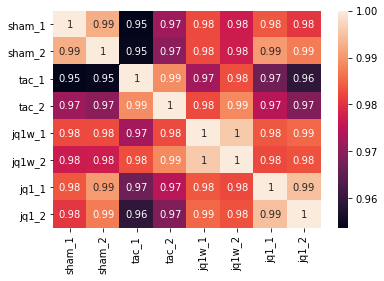

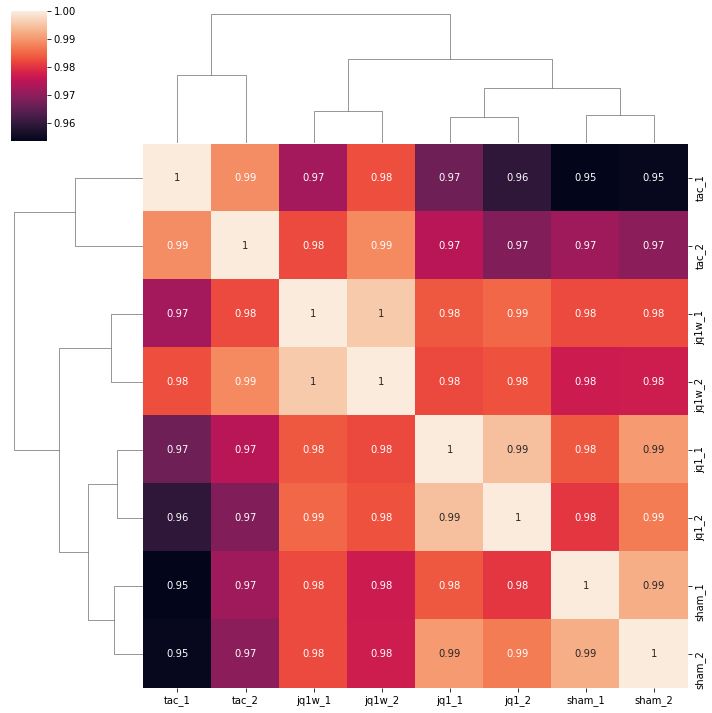

In [1]:
import data_science as ds 
import pandas as pd
import seaborn as sns

#wd = /pollard/home/smorin/Pollard-Lab
#data stored in : /pollard/data/projects/morin/Counts/

   
#----------------MAIN PROGRAM
rel_path = "../../../data/projects/morin/Counts/"
#store data in dictionary using key:sample, value: log(count+1) for CPM normalization
#and value: (log(count+1), length) for CPKM normalization
sampleDict = {} 

#retrieve samples from specified experiment
#experimental data
exp = "ATAC"

#file holding 16 sample names
#8 samples per experiment 
samples_dir = "../../../data/projects/morin/Samples_Dir"

samples = ds.getFileNames(samples_dir, exp)


#normalize the data using CPM or CPKM
#if CPM is True then we normalize by CPM, else we normalize by CPKM
CPM_bool = False

ds.normalize(CPM_bool, rel_path, samples, sampleDict )

# print(sampleDict)

#create data frame and rename columns from sample name to conditions
#with replicate number <condition_repl>
df = pd.DataFrame(data=sampleDict)
df.rename(columns={samples[0]:'sham_1',
                    samples[1]:'sham_2',
                    samples[2]:'tac_1', 
                    samples[3]:'tac_2',
                    samples[4]:'jq1w_1',
                    samples[5]:'jq1w_2',
                    samples[6]:'jq1_1',
                    samples[7]:'jq1_2',}, 
                    inplace=True)
print(df)

#not necessarily sequential analysis
#-----------------Analysis part 1: Violin and Swarmplot--------------------
#create figure objects 
# violin = sns.violinplot(data=df, inner = None)
# swarmplot = sns.swarmplot(data=df,color="black", edgecolor="gray", size=2)

#get figure and save figure
norm = '' 
if CPM_bool == True:
    norm = "CPM"
else:
    norm = "CPKM"
img_format = '.png'
figure1 = "violin_swarmplot"
filename1 = figure1 + '_' + exp + '_' + "samples" + '_' + norm + img_format
# fig1 = swarmplot.get_figure()
# fig1.savefig(filename1)


#-----------------Analysis part 2: Heatmap and Clustermap------------------
#create correlation matrix using the pearson correlation coefficient
corr_matrix = df.corr(method = 'pearson')
print(corr_matrix)

heatmap = sns.heatmap(corr_matrix, annot=True)
cluster = sns.clustermap(corr_matrix, annot=True)

figure2 = "heatmap"
filename2 = figure2 + '_' + exp + '_' + "samples" + '_' + norm + img_format
fig2 = heatmap.get_figure()
fig2.savefig(filename2,bbox_inches='tight')

figure3 = "clustermap"
filename3 = figure3 + '_' + exp + '_' + "samples" + '_' + norm + img_format
cluster.savefig(filename3)






In [5]:
import numpy as np
listx = [1,2,3,4,5]
log_list = [np.log(x+1) for x in listx]
print(log_list)

[0.6931471805599453, 1.0986122886681098, 1.3862943611198906, 1.6094379124341003, 1.791759469228055]
